## Asymmetry and Periodicity Metrics

Last update: 19 Jan 2024

**@juliaroquette** This notebook concentrates on the implementation of the a Python code for calculating the Assymetry and Periodicity indexes from Cody+.

**References**
- `C14`: [Cody+2014](https://iopscience.iop.org/article/10.1088/0004-6256/147/4/82)
- `C18`: [Cody+2018](https://iopscience.iop.org/article/10.3847/1538-3881/aacead)
- `B20`: [Bredall+2020](https://doi.org/10.1093%2Fmnras%2Fstaa1588)
- `C22`: [Cody+2022](https://iopscience.iop.org/article/10.3847/1538-3881/ac5b73)
- `H22`: [Hillenbrand+2022](https://iopscience.iop.org/article/10.3847/1538-3881/ac62d8)

![](https://content.cld.iop.org/journals/1538-3881/147/4/82/revision1/aj492147f8_lr.jpg?Expires=1706211409&Signature=ANR2FKG9Mg75LFi2fPfpVfgdKx~z8PajoShKj1l2AKeQaS7K1f2u3SWXaGa4LqunH6og1RjPtGO2lkWOexBJAJEiG64j0h4wd~ixyYf4Nr8VwQk9l9DquV~T277Ff99jEl87zgYt4EXKxq3c5OINEYj99cAAlSblw63r7gNldAk9YQfN3Pb5rOvuKHUYMaksjOP4g3t5ng2UYMFf5R7-McYdvieaI03opfv0aillqBaJ1uSQUjXZGnxbci11Y32e8YdPKemi3PETyYhNtBSFesHEfMU889heezzxGduj44fxEBpEa3dt1ishRlUjaw2tdH7XTJSc2E6VBbZDxNJShw__&Key-Pair-Id=KL1D8TIY3N7T8)


flux vs mag:

- `C14`: magnitude
- `C18`: flux
- `B20`: 
- `C22`: flux
- `H22`: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 100
time = np.linspace(0, 50, N)
mag = np.sin(2*np.pi*time/10.) + np.random.random_sample(N)*.5
err =  0.001*np.random.random_sample(N)
mask = np.where(np.isfinite(mag))[0]

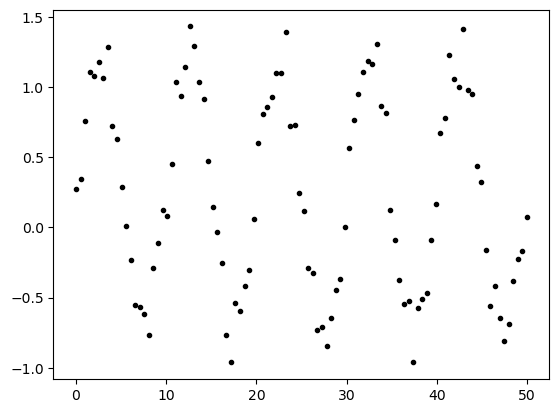

In [6]:
plt.plot(time[mask], mag[mask], 'k.')

# Filtering

## General
- `C14`: 
- `C18`: 
- `B20`: "remove the top and bottom 1 per cent of detections to clip potential outliers."
- `C22`: 
- `H22`: 


## For M-index

- `C14`: 2h-timescale filtering + 5$\sigma$-clipping -> remove outliers, than go back to the un-filtered lc but without outliers. "removed trends on longer timescales than 15-20 days by subtracting out a smoothed version of the light curve before computing M."
- `C18`: 
- `B20`: 
- `C22`: 
- `H22`: 


## For Q-index

- `C14`: by subtracting a boxcar-smoothed version with a window of 10 days.
- `C18`: 
- `B20`: 
- `C22`: 
- `H22`: 


# Period Search and Aperiodic Timescales

- `C14`: ACF + FFT around ACF peak + Peak-find for aperiodic timescale
- `C18`: 
- `B20`: 
- `C22`: 
- `H22`: 


# M- index: Asymmetry

$$M=\frac{<m_{10\%}>-m_{med}}{\sigma_m}$$

$<m_{10\%}>$ is all the data in the top and bottom decile of the light-curve. 
Not that there are conflicting definitions in the literature, where $\sigma_m$ is sometimes the overall rms of the light-curve and sometimes its standard-deviation! Here I am using the second one. 

The 10% percentile choice also changes in some paper, as some authors prefer a 20%. 

- `C14`: $\sigma_m$  is the overall rms. 10/90 percentiles
- `C18`: 5/95 percentiles
- `B20`: 10/90 percentiles. $\sigma_m$  is the standard deviation. 
- `C22`: same as `C18`
- `H22`: $\sigma_m$  is the standard deviation. 10/90 percentiles


In [7]:
def M_index(mag, per_up=90, per_down=10):
    return (np.mean(mag[(mag <= np.percentile(mag, per_down)) | (mag >= np.percentile(mag, per_up))]) - np.median(mag))/np.std(mag)

# Q-index from Cody+14 -> Periodicity

$Q = \frac{\sigma_\mathrm{res}^2-\sigma_\mathrm{phot}^2}{\sigma^2_\mathrm{raw}-\sigma^2_\mathrm{phot}}$, 

where:
- $\sigma_\mathrm{res}^2$ and $\sigma^2_\mathrm{raw}$ are the ~rms~ variance values of the raw light curve and the phase-subtracted light curve.
- $\sigma_\mathrm{raw}^2$ is the variance of the original light-curve
- $\sigma_\mathrm{phot}$ is the mean photometric error


- `C14`: 
- `C18`: 
- `B20`: 
- `C22`: 
- `H22`: 